<a href="https://colab.research.google.com/github/MadridVP/Challenge_Telecom-X-Parte-2-Predicci-n-de-Cancelaci-n-Churn-/blob/main/Challenge_ONE_Data_Science_Telecom_X1_VM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Cargar el archivo JSON en un DataFrame
df = pd.read_json('/content/TelecomX_Data.json')
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## **Verificar si hay problemas en los datos**


In [ ]:
df.isnull().sum()


,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
df.dtypes


,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [ ]:
import pandas as pd
from pandas import json_normalize

# 1. ¿Qué columnas tienen dicts?
cols_dict = [c for c in df.columns if df[c].apply(lambda x: isinstance(x, dict)).any()]
print("Columnas con dict:", cols_dict)

# 2. Aplanar cada una
for c in cols_dict:
    expanded = json_normalize(df[c]).add_prefix(f"{c}.")
    df = pd.concat([df.drop(columns=[c]), expanded], axis=1)

df.info()  # revisa la nueva estructura


Columnas con dict: ['customer', 'phone', 'internet', 'account']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null

In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df.duplicated(subset=["customerID"]).sum()


np.int64(0)

In [ ]:
for col in ["Churn", "internet.plan", "phone.contract", "account.tenure"]:
    if col in df.columns:
        print(col, df[col].unique()[:20])


Churn ['No' 'Yes' '']


In [ ]:
df.shape


(7267, 21)

In [ ]:
# Revisar valores únicos de la columna Churn
df["Churn"].unique()

# Revisar valores únicos de varias columnas
for col in df.columns:
    print(f"{col}: {df[col].unique()}")


customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
customer.gender: ['Female' 'Male']
customer.SeniorCitizen: [0 1]
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']
customer.tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone.PhoneService: ['Yes' 'No']
phone.MultipleLines: ['No' 'Yes' 'No phone service']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity: ['No' 'Yes' 'No internet service']
internet.OnlineBackup: ['Yes' 'No' 'No internet service']
internet.DeviceProtection: ['No' 'Yes' 'No internet service']
internet.TechSupport: ['Yes' 'No' 'No internet service']
internet.StreamingTV: ['Yes' 'No' 'No internet service']
internet.StreamingMovies: ['No' 'Yes' 'No internet service']
account.Contrac

In [ ]:
df.head(3)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [ ]:
df["Churn"] = df["Churn"].str.strip().str.title()


In [ ]:
df["account.PaperlessBilling"] = df["account.PaperlessBilling"].str.strip().str.title()
df["account.Contract"] = df["account.Contract"].str.strip().str.title()
df["account.PaymentMethod"] = df["account.PaymentMethod"].str.strip().str.title()


In [ ]:
df["Churn"].unique()
df["account.PaperlessBilling"].unique()
df["account.Contract"].unique()
df["account.PaymentMethod"].unique()


array(['Mailed Check', 'Electronic Check', 'Credit Card (Automatic)',
       'Bank Transfer (Automatic)'], dtype=object)

In [ ]:
print("Churn:", df["Churn"].unique())
print("PaperlessBilling:", df["account.PaperlessBilling"].unique())
print("Contract:", df["account.Contract"].unique())
print("PaymentMethod:", df["account.PaymentMethod"].unique())


Churn: ['No' 'Yes' '']
PaperlessBilling: ['Yes' 'No']
Contract: ['One Year' 'Month-To-Month' 'Two Year']
PaymentMethod: ['Mailed Check' 'Electronic Check' 'Credit Card (Automatic)'
 'Bank Transfer (Automatic)']


In [ ]:
#Limpiar Vacios
df["Churn"] = df["Churn"].replace({"": "No"})


In [ ]:
#Unificar
df["account.Contract"] = df["account.Contract"].replace({
    "Month-To-Month": "Month-to-month",
    "One Year": "One year",
    "Two Year": "Two year"
})


In [ ]:
#Unificar mayusculas con metodo de pago
df["account.PaymentMethod"] = df["account.PaymentMethod"].replace({
    "Electronic Check": "Electronic check",
    "Mailed Check": "Mailed check",
    "Credit Card (Automatic)": "Credit card (automatic)",
    "Bank Transfer (Automatic)": "Bank transfer (automatic)"
})


In [ ]:
#Verificacion de los cambios
print("Churn:", df["Churn"].unique())
print("PaperlessBilling:", df["account.PaperlessBilling"].unique())
print("Contract:", df["account.Contract"].unique())
print("PaymentMethod:", df["account.PaymentMethod"].unique())


Churn: ['No' 'Yes']
PaperlessBilling: ['Yes' 'No']
Contract: ['One year' 'Month-to-month' 'Two year']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [ ]:
df["Cuentas_Diarias"] = df["account.Charges.Monthly"] / 30


In [ ]:
df[["account.Charges.Monthly", "Cuentas_Diarias"]].head()


,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


#Estandarización y transformación de datos (opcional)


In [ ]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
df["account.PaperlessBilling"] = df["account.PaperlessBilling"].map({"Yes": 1, "No": 0})


In [ ]:
df = df.rename(columns={
    "account.Charges.Monthly": "Cargo_Mensual",
    "account.Charges.Total": "Cargo_Total",
    "account.Contract": "Tipo_Contrato",
    "account.PaperlessBilling": "Factura_Electronica",
    "account.PaymentMethod": "Metodo_Pago",
    "Cuentas_Diarias": "Cargo_Diario"
})


In [ ]:
# Análisis descriptivo básico
print("Resumen con describe():")
print(df.describe())

# Media de cada columna numérica
print("\nMedia:")
print(df.mean(numeric_only=True))

# Mediana de cada columna numérica
print("\nMediana:")
print(df.median(numeric_only=True))

# Desviación estándar de cada columna numérica
print("\nDesviación estándar:")
print(df.std(numeric_only=True))


Resumen con describe():
             Churn  customer.SeniorCitizen  customer.tenure  \
count  7267.000000             7267.000000      7267.000000   
mean      0.257190                0.162653        32.346498   
std       0.437115                0.369074        24.571773   
min       0.000000                0.000000         0.000000   
25%       0.000000                0.000000         9.000000   
50%       0.000000                0.000000        29.000000   
75%       1.000000                0.000000        55.000000   
max       1.000000                1.000000        72.000000   

       Factura_Electronica  Cargo_Mensual  Cargo_Diario  
count          7267.000000    7267.000000   7267.000000  
mean              0.593230      64.720098      2.157337  
std               0.491265      30.129572      1.004319  
min               0.000000      18.250000      0.608333  
25%               0.000000      35.425000      1.180833  
50%               1.000000      70.300000      2.343333  
75

#Distribucion de Churn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Conteo de valores en la columna churn
conteo_churn = df['churn'].value_counts()

KeyError: 'churn'

In [ ]:
print(df.columns)


Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'Tipo_Contrato',
       'Factura_Electronica', 'Metodo_Pago', 'Cargo_Mensual', 'Cargo_Total',
       'Cargo_Diario'],
      dtype='object')


In [ ]:
# Conteo de valores en la columna Churn
conteo_churn = df['Churn'].value_counts()

In [ ]:
# Mostrar conteo numérico
print("Conteo de Churn:")
print(conteo_churn)

Conteo de Churn:
Churn
0    5398
1    1869
Name: count, dtype: int64


/tmp/ipython-input-1651922537.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


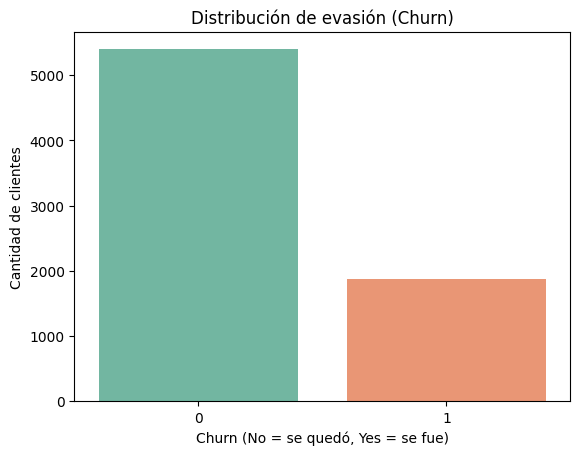

In [ ]:
# Gráfico de barras
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribución de evasión (Churn)')
plt.xlabel('Churn (No = se quedó, Yes = se fue)')
plt.ylabel('Cantidad de clientes')
plt.show()

In [ ]:
df['Churn'].value_counts()


,count
Churn,
0,5398
1,1869


In [ ]:
df['Churn_Label'] = df['Churn'].map({0: 'No se fue', 1: 'Se fue'})

In [ ]:
# Conteo
conteo_churn = df['Churn_Label'].value_counts()

/tmp/ipython-input-1104463996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn_Label', data=df, palette=['#66b3ff', '#ff9999'])


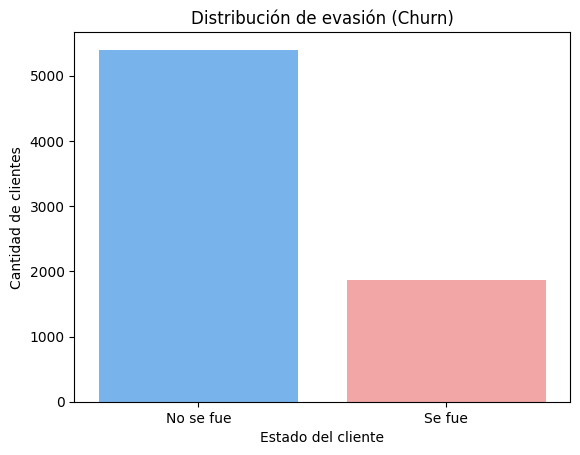

In [ ]:
# Gráfico de barras
sns.countplot(x='Churn_Label', data=df, palette=['#66b3ff', '#ff9999'])
plt.title('Distribución de evasión (Churn)')
plt.xlabel('Estado del cliente')
plt.ylabel('Cantidad de clientes')
plt.show()

/tmp/ipython-input-845360624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn_Label', data=df, palette={'No se fue': 'green', 'Se fue': 'orange'})


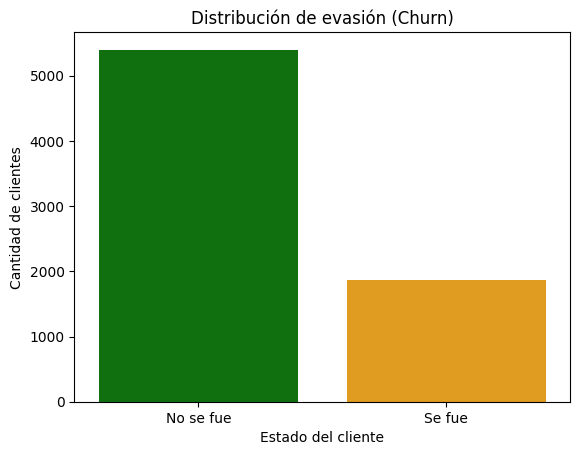

In [ ]:
# Crear una nueva columna con etiquetas
df['Churn_Label'] = df['Churn'].map({0: 'No se fue', 1: 'Se fue'})

# Conteo
conteo_churn = df['Churn_Label'].value_counts()

# Gráfico de barras con colores personalizados
sns.countplot(x='Churn_Label', data=df, palette={'No se fue': 'green', 'Se fue': 'orange'})
plt.title('Distribución de evasión (Churn)')
plt.xlabel('Estado del cliente')
plt.ylabel('Cantidad de clientes')
plt.show()

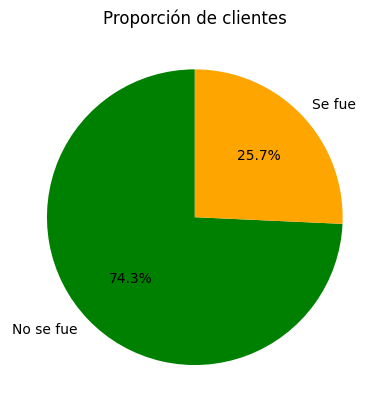

In [ ]:
# Gráfico de pastel con colores personalizados
plt.pie(conteo_churn, labels=conteo_churn.index, autopct='%1.1f%%', startangle=90, colors=['green', 'orange'])
plt.title('Proporción de clientes')
plt.show()

#**Churn por variables categoricas**


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Analizar las Variables categóricas
variables = ['customer.gender', 'Tipo_Contrato', 'Metodo_Pago']


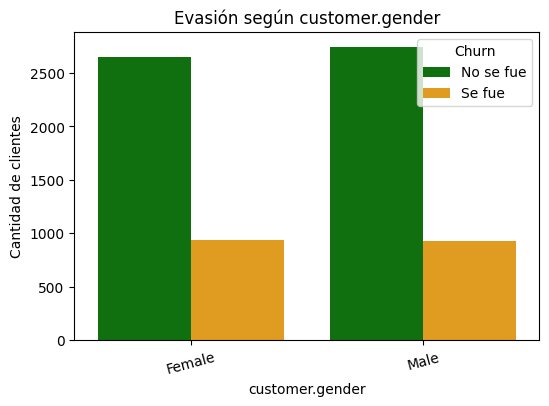

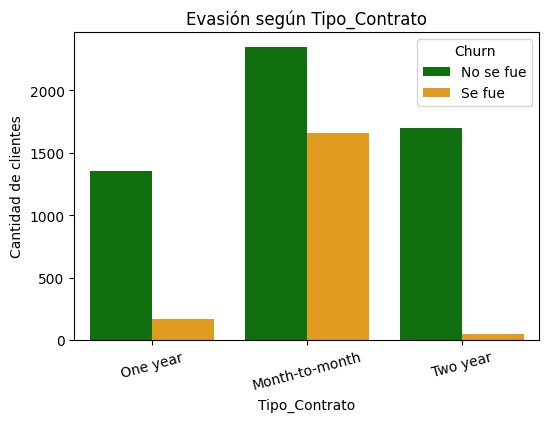

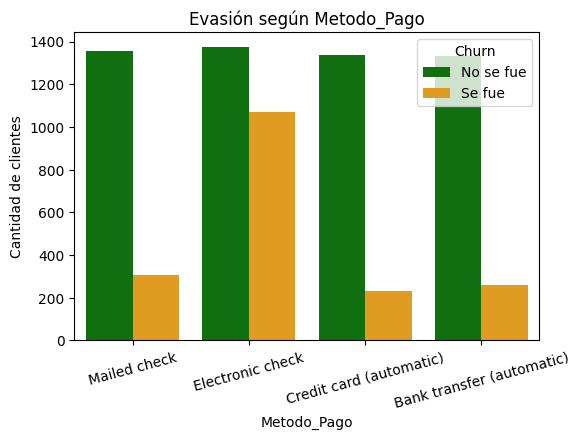

In [ ]:
# Crear los gráficos
for var in variables:
    plt.figure(figsize=(6,4))
    sns.countplot(x=var, hue='Churn_Label', data=df,
                  palette={'No se fue': 'green', 'Se fue': 'orange'})
    plt.title(f'Evasión según {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad de clientes')
    plt.legend(title='Churn')
    plt.xticks(rotation=15)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Analizar la Lista de variables numéricas
variables_numericas = ['Cargo_Total', 'customer.tenure']


/tmp/ipython-input-990344977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Label', y=var, data=df,


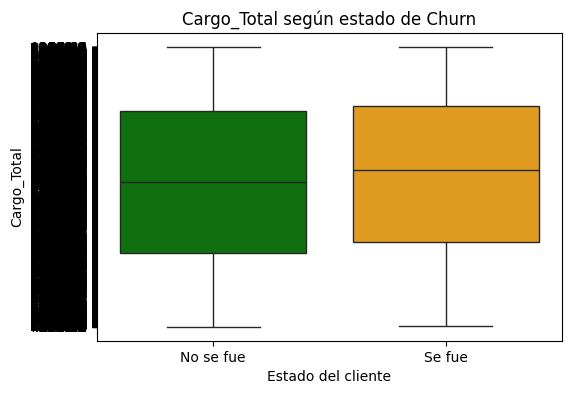

/tmp/ipython-input-990344977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Label', y=var, data=df,


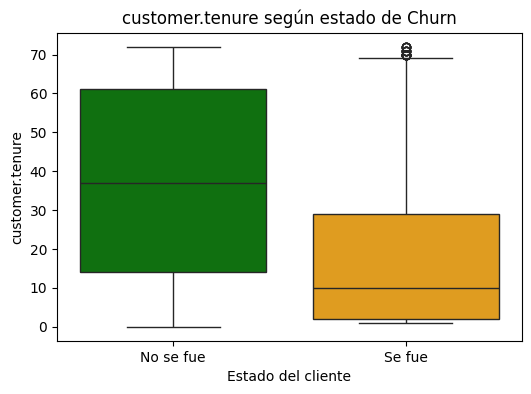

In [ ]:
for var in variables_numericas:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn_Label', y=var, data=df,
                palette={'No se fue': 'green', 'Se fue': 'orange'})
    plt.title(f'{var} según estado de Churn')
    plt.xlabel('Estado del cliente')
    plt.ylabel(var)
    plt.show()

##**Informe Final**


### Introducción

El presente análisis tiene como objetivo comprender los factores que influyen en la evasión de clientes (Churn) en una empresa de telecomunicaciones.
El Churn representa a los clientes que han cancelado el servicio en un período determinado. Reducir esta tasa es crucial, ya que retener a un cliente existente es más rentable que adquirir uno nuevo.

A través de este estudio, se identificaron patrones y variables asociadas a la evasión, con el fin de proponer estrategias efectivas para mejorar la retención.

###Limpieza y Tratamiento de Datos
Importación de datos

Los datos fueron importados desde un archivo JSON provisto, utilizando pandas para su carga y manipulación.

Revisión de estructura

Se inspeccionaron las columnas, tipos de datos y valores faltantes (df.info(), df.describe()).

Creación de variables auxiliares

Se creó la columna Churn_Label para mapear los valores de Churn (0 = No se fue, 1 = Se fue) con etiquetas descriptivas.

Preparación para análisis

Se identificaron variables categóricas (género, tipo de contrato, método de pago) y numéricas (Cargo_Total, customer.tenure).[link text](https://)

##Análisis Exploratorio de Datos (EDA)

# 1. Distribución de Evasión General
El 25,7% de los clientes se fueron, mientras que el 74,3% permanecieron.

Esto indica una tasa de evasión moderada que merece atención.

Gráfico de barras y pastel mostrando proporción de Churn.

# 2. Evasión por Variables Categóricas

**Género:** No presenta diferencias significativas entre hombres y mujeres.  

**Tipo de Contrato:** Los contratos *Month-to-month* tienen la mayor tasa de evasión, mientras que *One year* y *Two year* retienen mejor a los clientes.  

**Método de Pago:** El pago mediante *Electronic check* presenta la mayor evasión; métodos automáticos muestran menor tasa.

_Gráficos comparativos por categoría._


#3. Evasión por Variables Numéricas
Cargo_Total: Los clientes que se fueron tienen un gasto total medianamente mayor, lo que podría indicar sensibilidad a costos.

Tiempo de Contrato (tenure): La evasión es más alta en clientes con menor tiempo de contrato; a mayor antigüedad, menor probabilidad de cancelación.

Boxplots para comparar distribuciones.

##**Conclusiones**

1- Tipo de contrato y método de pago son fuertes predictores de evasión.

2- Los clientes que pagan mes a mes y con Electronic check tienen mayor probabilidad de cancelar.

3- La permanencia corta está altamente asociada con la evasión.

4- Aunque el gasto total es algo mayor en los que se van, no es un factor tan determinante como el tiempo de contrato.

##**Recomendaciones Estrategicas**

* Incentivar contratos anuales o bianuales con beneficios atractivos (descuentos, upgrades).

* Promover métodos de pago automáticos para disminuir la evasión.

Programas de fidelización enfocados en clientes con menos de 12 meses de antigüedad.

* Monitoreo proactivo: Identificar clientes con perfiles de alto riesgo (contrato mensual + pago por Electronic check) y contactarlos con ofertas personalizadas.

* Evaluar estructura de precios para clientes con gasto elevado que muestran señales de deserción.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación solo para variables numéricas
corr_matrix = df.corr(numeric_only=True)

# Mostrar la correlación de cada variable con Churn (ordenada)
corr_with_churn = corr_matrix['Churn'].sort_values(ascending=False)
print("Correlaciones con Churn:")
print(corr_with_churn)


Correlaciones con Churn:
Churn                     1.000000
Cargo_Diario              0.189866
Cargo_Mensual             0.189866
Factura_Electronica       0.186666
customer.SeniorCitizen    0.146733
customer.tenure          -0.344079
Name: Churn, dtype: float64


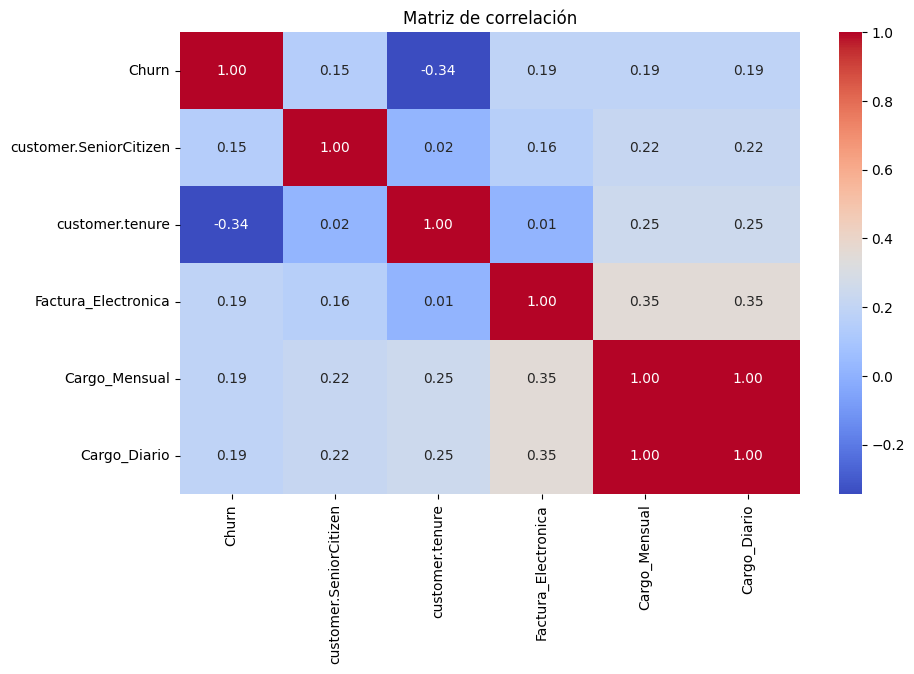

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


/tmp/ipython-input-358705685.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Label', y='Cargo_Diario', data=df,


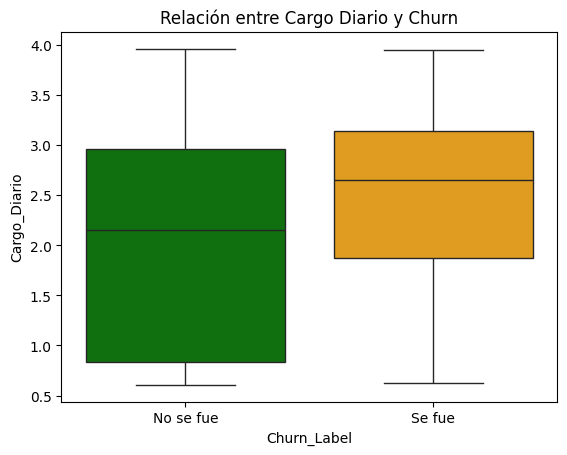

In [ ]:
sns.boxplot(x='Churn_Label', y='Cargo_Diario', data=df,
            palette={'No se fue': 'green', 'Se fue': 'orange'})
plt.title('Relación entre Cargo Diario y Churn')
plt.show()


/tmp/ipython-input-1890262255.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Label', y='Servicios_Contratados', data=df,


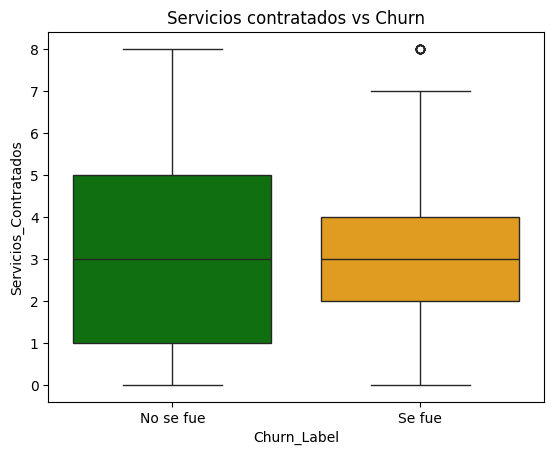

In [ ]:
# Lista de columnas de servicios
servicios_cols = [
    'phone.PhoneService', 'phone.MultipleLines',
    'internet.InternetService', 'internet.OnlineSecurity',
    'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV',
    'internet.StreamingMovies'
]

# Contar cuántos servicios tiene cada cliente (No/Yes -> 0/1)
df['Servicios_Contratados'] = df[servicios_cols].apply(lambda row: sum(row == 'Yes'), axis=1)

# Gráfico
sns.boxplot(x='Churn_Label', y='Servicios_Contratados', data=df,
            palette={'No se fue': 'green', 'Se fue': 'orange'})
plt.title('Servicios contratados vs Churn')
plt.show()


##**Extracción del Archivo Tratado_Challenge Telecom X_Parte_2**


In [61]:

df.to_csv("datos_tratados.csv", index=False)

##Eliminar Columnas Irrelevantes

In [62]:
# Mostrar todas las columnas del dataset
print("Columnas del dataset:")
print(df.columns.tolist())


Columnas del dataset:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'Tipo_Contrato', 'Factura_Electronica', 'Metodo_Pago', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario']


In [66]:
df = df.drop(columns=["customerID", "Cargo_Diario"], errors="ignore")

print("Columnas finales:")
print(df.columns.tolist())


Columnas finales:
['Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'Tipo_Contrato', 'Factura_Electronica', 'Metodo_Pago', 'Cargo_Mensual', 'Cargo_Total']


##Ecoding

In [67]:
# Aplicar one-hot encoding a las variables categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Revisar cómo quedó
print("Columnas después de la transformación:")
print(df_encoded.columns.tolist())
df_encoded.head()


Columnas después de la transformación:
['Churn', 'customer.SeniorCitizen', 'customer.tenure', 'Factura_Electronica', 'Cargo_Mensual', 'customer.gender_Male', 'customer.Partner_Yes', 'customer.Dependents_Yes', 'phone.PhoneService_Yes', 'phone.MultipleLines_No phone service', 'phone.MultipleLines_Yes', 'internet.InternetService_Fiber optic', 'internet.InternetService_No', 'internet.OnlineSecurity_No internet service', 'internet.OnlineSecurity_Yes', 'internet.OnlineBackup_No internet service', 'internet.OnlineBackup_Yes', 'internet.DeviceProtection_No internet service', 'internet.DeviceProtection_Yes', 'internet.TechSupport_No internet service', 'internet.TechSupport_Yes', 'internet.StreamingTV_No internet service', 'internet.StreamingTV_Yes', 'internet.StreamingMovies_No internet service', 'internet.StreamingMovies_Yes', 'Tipo_Contrato_One year', 'Tipo_Contrato_Two year', 'Metodo_Pago_Credit card (automatic)', 'Metodo_Pago_Electronic check', 'Metodo_Pago_Mailed check', 'Cargo_Total_100.2

,Churn,customer.SeniorCitizen,customer.tenure,Factura_Electronica,Cargo_Mensual,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,Cargo_Total_995.35,Cargo_Total_996.45,Cargo_Total_996.85,Cargo_Total_996.95,Cargo_Total_997.65,Cargo_Total_997.75,Cargo_Total_998.1,Cargo_Total_999.45,Cargo_Total_999.8,Cargo_Total_999.9
0,0,0,9,1,65.6,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,9,0,59.9,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1,0,4,1,73.9,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1,1,13,1,98.0,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1,1,3,1,83.9,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
df = pd.get_dummies(df, drop_first=True)


##Verifir de la Proporción de Cancelación (Churn)

In [69]:
# Contar cuántos clientes cancelaron y cuántos no
print(df["Churn"].value_counts())


Churn
0    5398
1    1869
Name: count, dtype: int64


In [70]:
# Calcular proporción en porcentaje
print(df["Churn"].value_counts(normalize=True))


Churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64


##Balancear Clases (opcional)

In [71]:
df["Churn"].value_counts(normalize=True)


,proportion
Churn,
0,0.74281
1,0.25719


In [72]:
!pip install imbalanced-learn


In [73]:
from imblearn.over_sampling import RandomOverSampler

# Definir X (features) e y (target)
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Aplicar oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Revisar proporciones después
print(y_resampled.value_counts(normalize=True))


Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


##Normalizar o Estandarizar (si es necesario)

In [74]:
import pandas as pd
import numpy as np

# 1) QUITAR columnas que no ayudan (IDs, derivados)
df = df.drop(columns=["customerID", "Cargo_Diario"], errors="ignore")

# 2) ASEGURAR que la columna objetivo exista y sea 0/1
#    Ajusta el nombre si tu target fuera distinto a "Churn"
y = df["Churn"].copy()

# Si está como texto, lo mapeamos a 0/1
if y.dtype == "O":
    y = y.replace({
        "Yes": 1, "No": 0,
        "Se fue": 1, "No se fue": 0,
        "Canceló": 1, "Activo": 0
    })

# Por si quedan valores raros, intentamos convertir a número
y = pd.to_numeric(y, errors="coerce")
# Quitamos filas sin target válido
mask = ~y.isna()
df = df.loc[mask].reset_index(drop=True)
y  = y.loc[mask].astype(int).reset_index(drop=True)

print("Balance de clases (conteo):")
print(y.value_counts())
print("\nBalance de clases (proporción):")
print(y.value_counts(normalize=True).round(3))


Balance de clases (conteo):
Churn
0    5398
1    1869
Name: count, dtype: int64

Balance de clases (proporción):
Churn
0    0.743
1    0.257
Name: proportion, dtype: float64


In [75]:
# Separamos features (X) de la etiqueta (y)
X = df.drop(columns=["Churn"])

# One-hot encoding para TODAS las categóricas de X
X = pd.get_dummies(X, drop_first=True)

print("Dimensiones de X e y:", X.shape, y.shape)
X.head(3)


Dimensiones de X e y: (7267, 6559) (7267,)


,customer.SeniorCitizen,customer.tenure,Factura_Electronica,Cargo_Mensual,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,phone.MultipleLines_Yes,...,Cargo_Total_995.35,Cargo_Total_996.45,Cargo_Total_996.85,Cargo_Total_996.95,Cargo_Total_997.65,Cargo_Total_997.75,Cargo_Total_998.1,Cargo_Total_999.45,Cargo_Total_999.8,Cargo_Total_999.9
0,0,9,1,65.6,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,9,0,59.9,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0,4,1,73.9,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((5086, 6559), (2181, 6559))

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

tree = DecisionTreeClassifier(
    random_state=42,  # reproducible
    # max_depth= None (por defecto). Si ves sobreajuste, prueba max_depth=4..10
)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)[:, 1]

print("=== Decision Tree ===")
print("MATRIZ DE CONFUSIÓN\n", confusion_matrix(y_test, y_pred_tree))
print("\nREPORTE DE CLASIFICACIÓN\n", classification_report(y_test, y_pred_tree, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_tree).round(3))


=== Decision Tree ===
MATRIZ DE CONFUSIÓN
 [[1393  227]
 [ 300  261]]

REPORTE DE CLASIFICACIÓN
               precision    recall  f1-score   support

           0      0.823     0.860     0.841      1620
           1      0.535     0.465     0.498       561

    accuracy                          0.758      2181
   macro avg      0.679     0.663     0.669      2181
weighted avg      0.749     0.758     0.753      2181

ROC-AUC: 0.665


In [78]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced_subsample"  # ayuda si hay desbalance
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("=== Random Forest ===")
print("MATRIZ DE CONFUSIÓN\n", confusion_matrix(y_test, y_pred_rf))
print("\nREPORTE DE CLASIFICACIÓN\n", classification_report(y_test, y_pred_rf, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf).round(3))


=== Random Forest ===
MATRIZ DE CONFUSIÓN
 [[1462  158]
 [ 308  253]]

REPORTE DE CLASIFICACIÓN
               precision    recall  f1-score   support

           0      0.826     0.902     0.863      1620
           1      0.616     0.451     0.521       561

    accuracy                          0.786      2181
   macro avg      0.721     0.677     0.692      2181
weighted avg      0.772     0.786     0.775      2181

ROC-AUC: 0.825


In [80]:
# Agregar XGBoost:
!pip install -q xgboost


In [81]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss"  # evita warnings
)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

print("=== XGBoost ===")
print("MATRIZ DE CONFUSIÓN\n", confusion_matrix(y_test, y_pred_xgb))
print("\nREPORTE DE CLASIFICACIÓN\n", classification_report(y_test, y_pred_xgb, digits=3))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb).round(3))


=== XGBoost ===
MATRIZ DE CONFUSIÓN
 [[1442  178]
 [ 284  277]]

REPORTE DE CLASIFICACIÓN
               precision    recall  f1-score   support

           0      0.835     0.890     0.862      1620
           1      0.609     0.494     0.545       561

    accuracy                          0.788      2181
   macro avg      0.722     0.692     0.704      2181
weighted avg      0.777     0.788     0.780      2181

ROC-AUC: 0.831


In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def resumen(nombre, y_test, y_pred, y_prob):
    return {
        "modelo": nombre,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, zero_division=0),
        "recall": recall_score(y_test, y_pred, zero_division=0),
        "f1": f1_score(y_test, y_pred, zero_division=0),
        "roc_auc": roc_auc_score(y_test, y_prob),
    }

tabla = []
tabla.append(resumen("Decision Tree", y_test, y_pred_tree, y_prob_tree))
tabla.append(resumen("Random Forest", y_test, y_pred_rf, y_prob_rf))
tabla.append(resumen("XGBoost",       y_test, y_pred_xgb, y_prob_xgb))

pd.DataFrame(tabla).round(3).sort_values("roc_auc", ascending=False)


,modelo,accuracy,precision,recall,f1,roc_auc
2,XGBoost,0.788,0.609,0.494,0.545,0.831
1,Random Forest,0.786,0.616,0.451,0.521,0.825
0,Decision Tree,0.758,0.535,0.465,0.498,0.665


##Correlación y Selección de Variables

##Análisis de Correlación

In [83]:
# Seleccionar solo las columnas numéricas
df_num = df.select_dtypes(include=["int64", "float64"])

# Mostrar las primeras columnas numéricas
print("Columnas numéricas:", df_num.columns.tolist())
df_num.head()


Columnas numéricas: ['Churn', 'customer.SeniorCitizen', 'customer.tenure', 'Factura_Electronica', 'Cargo_Mensual']


,Churn,customer.SeniorCitizen,customer.tenure,Factura_Electronica,Cargo_Mensual
0,0,0,9,1,65.6
1,0,0,9,0,59.9
2,1,0,4,1,73.9
3,1,1,13,1,98.0
4,1,1,3,1,83.9


In [84]:
# Calcular la matriz de correlación
corr = df_num.corr()

# Mostrar la correlación de todas las variables con Churn
print("Correlación con Churn:")
print(corr["Churn"].sort_values(ascending=False))


Correlación con Churn:
Churn                     1.000000
Cargo_Mensual             0.189866
Factura_Electronica       0.186666
customer.SeniorCitizen    0.146733
customer.tenure          -0.344079
Name: Churn, dtype: float64


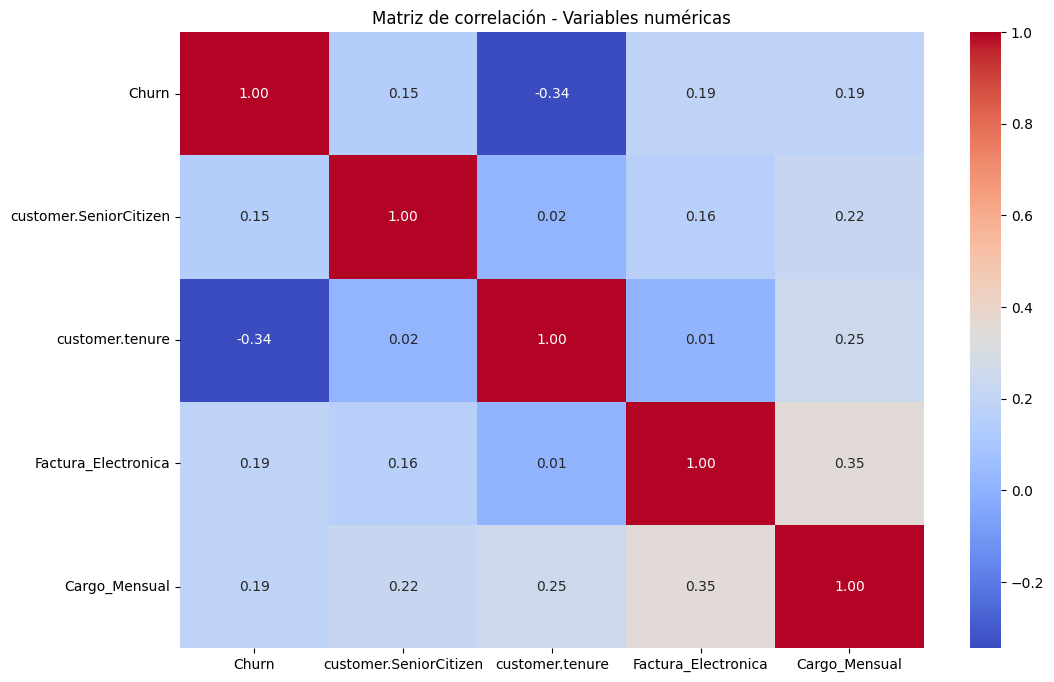

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación - Variables numéricas")
plt.show()


##Análisis Dirigido

In [87]:
df["Churn"] = df["Churn"].map({"Yes":1, "No":0, "Se fue":1, "No se fue":0})


ValueError: List of boxplot statistics and `positions` values must have same the length

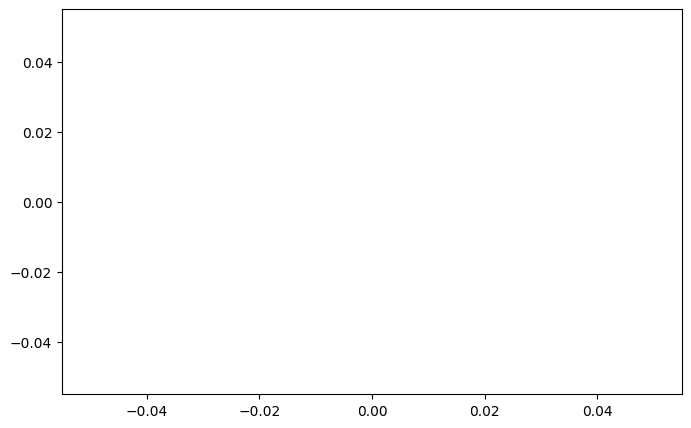

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x="Churn", y="customer.tenure", data=df)
plt.title("Tiempo de contrato vs Cancelación")
plt.xlabel("Churn (0 = No canceló, 1 = Canceló)")
plt.ylabel("Meses de contrato (tenure)")
plt.show()


In [89]:
# Contar cuántos valores vacíos hay en cada columna
print(df.isna().sum())


Churn                     7267
customer.SeniorCitizen       0
customer.tenure              0
Factura_Electronica          0
Cargo_Mensual                0
                          ... 
Cargo_Total_997.75           0
Cargo_Total_998.1            0
Cargo_Total_999.45           0
Cargo_Total_999.8            0
Cargo_Total_999.9            0
Length: 6560, dtype: int64


In [90]:
df["Churn"] = df["Churn"].fillna("No")


In [91]:
df["Churn"] = df["Churn"].map({"Yes":1, "No":0, "Se fue":1, "No se fue":0})


<Axes: xlabel='Churn', ylabel='customer.tenure'>

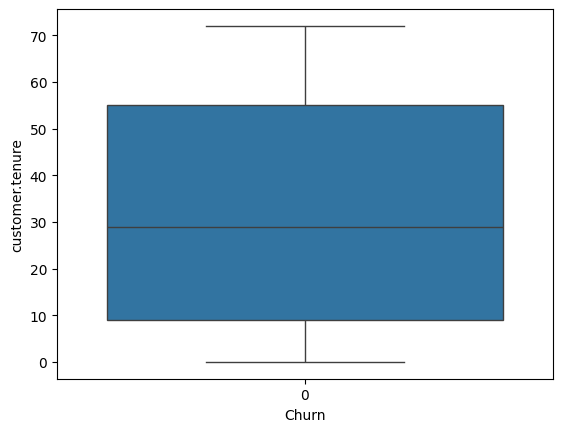

In [92]:
sns.boxplot(x="Churn", y="customer.tenure", data=df)


##**Modelo Predictivo**

##Separar Datos

In [93]:
# Features (todas menos la variable target)
X = df.drop("Churn", axis=1)

# Target (lo que queremos predecir)
y = df["Churn"]


In [94]:
from sklearn.model_selection import train_test_split

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño del dataset total:", X.shape)
print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)


Tamaño del dataset total: (7267, 6559)
Tamaño de entrenamiento: (5086, 6559)
Tamaño de prueba: (2181, 6559)


##Creación de Modelos

In [96]:
#Normalizar datos
from sklearn.preprocessing import StandardScaler

# Hacer copia para no modificar X
X_scaled = X.copy()

# Normalizar solo las variables numéricas
num_cols = X.select_dtypes(include=["int64","float64"]).columns
scaler = StandardScaler()
X_scaled[num_cols] = scaler.fit_transform(X_scaled[num_cols])


In [97]:
# Usar Regresion Logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Usar datos normalizados
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Entrenamiento
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_log = log_model.predict(X_test_scaled)

print("📊 Regresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)

In [98]:
print("Distribución en todo el dataset:")
print(y.value_counts())


Distribución en todo el dataset:
Churn
0    7267
Name: count, dtype: int64


In [99]:
print("Distribución en entrenamiento:")
print(y_train.value_counts())

print("Distribución en prueba:")
print(y_test.value_counts())


Distribución en entrenamiento:
Churn
0    5086
Name: count, dtype: int64
Distribución en prueba:
Churn
0    2181
Name: count, dtype: int64


In [100]:
print(df["Churn"].unique()[:20])
print(y.value_counts(dropna=False))


[0]
Churn
0    7267
Name: count, dtype: int64


In [101]:
print(df["Churn"].unique())


[0]


In [102]:
# ¿Hay columnas relacionadas con churn creadas por get_dummies?
cands = [c for c in df.columns if "churn" in c.lower()]
print(cands)


['Churn']


In [103]:
# Revisamos valores únicos originales
print(df["Churn"].unique()[:20])

# Intentamos mapear a binario
df["Churn"] = df["Churn"].astype(str).str.strip()  # limpiamos espacios

df["Churn_bin"] = df["Churn"].replace({
    "Yes": 1, "No": 0,
    "Se fue": 1, "No se fue": 0,
    "True": 1, "False": 0,
    "1": 1, "0": 0
})

print("Distribución después del mapeo:")
print(df["Churn_bin"].value_counts(dropna=False))


[0]
Distribución después del mapeo:
Churn_bin
0    7267
Name: count, dtype: int64


/tmp/ipython-input-3117147192.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn_bin"] = df["Churn"].replace({


In [104]:
y = df["Churn_bin"].astype(int)


In [108]:
import pandas as pd

# Cargar directamente desde GitHub
url = "https://raw.githubusercontent.com/MadridVP/Challenge_Telecom-X-Parte-2-Predicci-n-de-Cancelaci-n-Churn-/main/TelecomX_Data.json"

df = pd.read_json(url)


HTTPError: HTTP Error 404: Not Found

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_json("TelecomX_Data.json")


##Evaluación de los Modelos